In [1]:
#imput library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [2]:
#imput data 

data = pd.read_csv('Dataset.csv')             
predictors =['Lomba', 'Organisasi', 'IPS_1','IPS_2', 'IPS_3', 'Absensi_smstr_1', 'Absensi_smstr_2', 'Absensi_smstr_3', 'SKS_smstr_1', 'SKS_smstr_2','SKS_smstr_3']
label = 'Prestasi'
data.head()


,Lomba,Organisasi,IPS_1,IPS_2,IPS_3,Absensi_smstr_1,Absensi_smstr_2,Absensi_smstr_3,SKS_smstr_1,SKS_smstr_2,SKS_smstr_3,Prestasi
0,0,1,2.8,3.1,2.9,16.0,14,13,19,20,22,Rendah
1,1,2,3.2,3.4,3.0,15.0,13,14,18,20,21,Tidak Rendah
2,0,1,2.9,3.0,2.7,18.0,15,12,20,19,22,Rendah
3,1,1,3.0,3.2,3.1,17.0,16,14,19,21,23,Tidak Rendah
4,0,2,3.1,3.3,3.2,19.0,18,15,21,22,23,Tidak Rendah


In [3]:
#Daftar Kategorik

le = dict()
for column in data.columns:
    if data[column].dtype == np.object:
        le[column] = LabelEncoder()
        data[column] = le[column].fit_transform(data[column])


C:\Users\aslan\AppData\Local\Temp\ipykernel_2764\3541527517.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data[column].dtype == np.object:


In [4]:
#Label encoder
from sklearn import preprocessing
predictors =['Lomba', 'Organisasi', 'IPS_1','IPS_2', 'IPS_3', 'Absensi_smstr_1', 'Absensi_smstr_2', 'Absensi_smstr_3', 'SKS_smstr_1', 'SKS_smstr_2','SKS_smstr_3']
labelEncoder = preprocessing.LabelEncoder()
data.head()

,Lomba,Organisasi,IPS_1,IPS_2,IPS_3,Absensi_smstr_1,Absensi_smstr_2,Absensi_smstr_3,SKS_smstr_1,SKS_smstr_2,SKS_smstr_3,Prestasi
0,0,1,2.8,3.1,2.9,16.0,14,13,19,20,22,0
1,1,2,3.2,3.4,3.0,15.0,13,14,18,20,21,1
2,0,1,2.9,3.0,2.7,18.0,15,12,20,19,22,0
3,1,1,3.0,3.2,3.1,17.0,16,14,19,21,23,1
4,0,2,3.1,3.3,3.2,19.0,18,15,21,22,23,1


In [5]:
#Variabel Independen
X = data.drop(["Prestasi"], axis=1)
X.head()

,Lomba,Organisasi,IPS_1,IPS_2,IPS_3,Absensi_smstr_1,Absensi_smstr_2,Absensi_smstr_3,SKS_smstr_1,SKS_smstr_2,SKS_smstr_3
0,0,1,2.8,3.1,2.9,16.0,14,13,19,20,22
1,1,2,3.2,3.4,3.0,15.0,13,14,18,20,21
2,0,1,2.9,3.0,2.7,18.0,15,12,20,19,22
3,1,1,3.0,3.2,3.1,17.0,16,14,19,21,23
4,0,2,3.1,3.3,3.2,19.0,18,15,21,22,23


In [6]:
#Variabel Dependen
y=data["Prestasi"]
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Prestasi, dtype: int32

In [7]:
#DataTesting dan Training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
test_size=0.3, random_state=1234)

In [8]:
#Proporsi Data Testing dan Training
print(X_train.shape)
print(X_test.shape)

(168, 11)
(72, 11)


In [9]:
X_train

,Lomba,Organisasi,IPS_1,IPS_2,IPS_3,Absensi_smstr_1,Absensi_smstr_2,Absensi_smstr_3,SKS_smstr_1,SKS_smstr_2,SKS_smstr_3
22,0,1,2.9,3.0,2.7,18.0,15,12,20,19,22
145,1,2,3.5,3.7,3.6,14.0,15,14,17,19,20
110,0,1,2.8,3.1,2.9,16.0,14,13,19,20,22
167,0,2,2.7,3.0,2.9,17.0,16,15,18,19,20
108,0,1,3.0,3.2,3.1,15.0,14,14,19,20,22
...,...,...,...,...,...,...,...,...,...,...,...
204,0,2,3.1,3.3,3.2,19.0,18,15,21,22,23
53,1,1,3.0,3.2,3.1,17.0,16,14,19,21,23
38,0,1,3.0,3.2,3.1,15.0,14,14,19,20,22
211,1,2,3.2,3.4,3.0,15.0,13,14,18,20,21


In [10]:
X_test

,Lomba,Organisasi,IPS_1,IPS_2,IPS_3,Absensi_smstr_1,Absensi_smstr_2,Absensi_smstr_3,SKS_smstr_1,SKS_smstr_2,SKS_smstr_3
226,1,1,3.2,3.4,3.3,16.0,18,17,19,20,21
231,1,2,3.2,3.4,3.0,15.0,13,14,18,20,21
31,1,2,3.2,3.4,3.0,15.0,13,14,18,20,21
52,0,1,2.9,3.0,2.7,18.0,15,12,20,19,22
71,1,2,3.2,3.4,3.0,15.0,13,14,18,20,21
...,...,...,...,...,...,...,...,...,...,...,...
91,1,2,3.2,3.4,3.0,15.0,13,14,18,20,21
129,1,2,3.3,3.6,3.4,18.0,17,16,20,21,23
180,0,1,2.8,3.1,2.9,16.0,14,13,19,20,22
136,1,1,3.2,3.4,3.3,16.0,18,17,19,20,21


In [11]:
y_train

22     0
145    1
110    0
167    0
108    1
      ..
204    1
53     1
38     1
211    1
47     0
Name: Prestasi, Length: 168, dtype: int32

In [12]:
y_test

226    1
231    1
31     1
52     0
71     1
      ..
91     1
129    1
180    0
136    1
182    0
Name: Prestasi, Length: 72, dtype: int32

In [13]:
data[label]

0      0
1      1
2      0
3      1
4      1
      ..
235    1
236    1
237    0
238    1
239    1
Name: Prestasi, Length: 240, dtype: int32

In [14]:
#analisis random forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor (n_estimators = 11,random_state=1234)
regressor.fit (X_train, y_train)
y_pred=regressor.predict (X_test)

In [15]:
# membuat model train parameter default

def evaluatetraint(model, X=X_train, y=y_train):
    predictions = model.predict(X=X_train)
    errors = abs(predictions - y_train)
    mape = 100 * np.mean(errors / y_train)
    accuracy = 100 - mape
    
    print ('model performance training')
    print ('average error: {:0,4f} degrees.'.format(np.mean(errors)))
    print ('accuracy = {:0.2f}%.'.format(accuracy))
      
    return accuracy
    
    base_modeltrain = RandomForestRegressor(random_state = 1234)
    base_model.fit(X=X_train, y=y_train)
    base_accuracytrain = evaluatetrain(base_model, X=X_train, y=y_train)

In [16]:
# membuat model test parameter default
def evaluatetest(model, X=X_test, y=y_test):
    predictions = model.predict(X=X_test)
    errorstest = abs(predictionstest - y_test)
    mapetest = 100 * np.mean(errorstest / y_test)
    accuracytest = 100 - mapetest
    
    print ('model performance testing')
    print ('average error: {:0,4f} degrees.'.format(np.mean(errorstest)))
    print ('accuracy = {:0.2f}%.'.format(accuracytest))
        
    return accuracytest
    
    base_modeltest = RandomForestRegressor(random_state = 1234)
    base_model.fit(X=X_test, y=y_test)
    base_accuracytest = evaluatetest(base_model, X=X_test, y=y_test)

In [17]:
#Perhitungan Akurasi
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE :', np.mean(np.abs((y_test - y_pred) / y_test))*100)
print ('Nilai akurasi :', (1-(np.mean(np.abs((y_test - y_pred) / y_test))))*100)

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
MAPE : 0.0
Nilai akurasi : 100.0


In [18]:
#Nilai Koefiisien Determinasi Data Testing dan Training
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
y_pred2=regressor.predict(X_train)
r2_score(y_train, y_pred2)

1.0

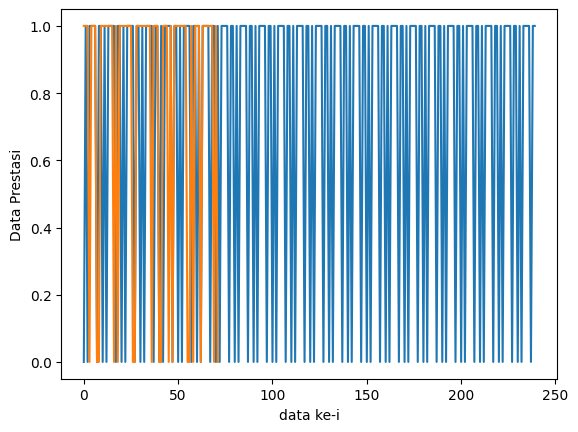

In [19]:
#perbandingan nilai aktual n prediksi 1
import matplotlib.pyplot as plt
plt.plot(y,label="Data Asli")
plt.plot(y_pred, label="Data prediksi")
plt.ylabel('Data Prestasi')
plt.xlabel('data ke-i')
plt.show()

In [20]:
predicts = regressor.predict(X_test)
error_panen = pd.DataFrame({
'Actual Values': np.array(y_test).flatten(),
'Predicted Values': predicts.flatten()})
error_panen.head(90)

,Actual Values,Predicted Values
0,1,1.0
1,1,1.0
2,1,1.0
3,0,0.0
4,1,1.0
...,...,...
67,1,1.0
68,1,1.0
69,0,0.0
70,1,1.0


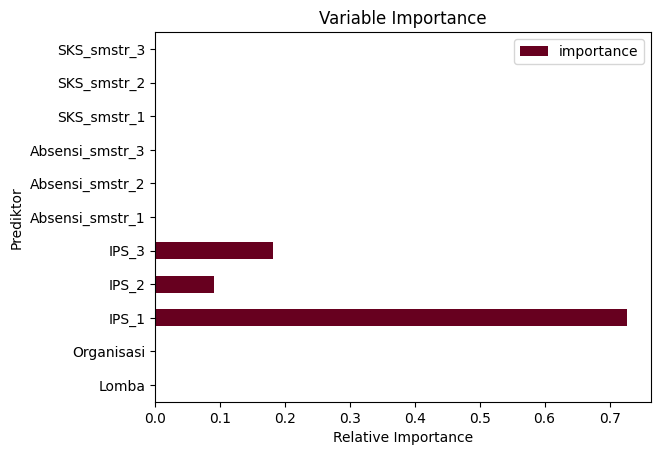

          Prediktor  importance
0             Lomba    0.000000
1        Organisasi    0.000000
2             IPS_1    0.727273
3             IPS_2    0.090909
4             IPS_3    0.181818
5   Absensi_smstr_1    0.000000
6   Absensi_smstr_2    0.000000
7   Absensi_smstr_3    0.000000
8       SKS_smstr_1    0.000000
9       SKS_smstr_2    0.000000
10      SKS_smstr_3    0.000000


In [21]:
#Feature Importance

features = list(X_train.columns)
feature_importances = pd.DataFrame({'Prediktor': features,'importance': regressor.feature_importances_})
feature_importances .plot(x ='Prediktor', y='importance', kind ='barh',  colormap='RdBu')
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
print(feature_importances)

In [22]:
#sv model
import pickle
pickle.dump(regressor, open('modelsvm.pkl','wb'))
model = pickle.load(open('modelsvm.pkl','rb'))
print(model.predict([[0,1,2.8,3.1,2.9,16,14,13,19,20,22]]))



[0.]


C:\Users\aslan\anaconda3\envs\aslan\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
